## IMPORTING THE DATASET

In [ ]:
# Install Yahoo Finance Library
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Mount drive
from google.colab import drive
drive.mount('drive')

# For data manipulation
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm
from math import log
from scipy.stats import norm

# To fetch financial data
import yfinance as yf

# For visualisation
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
%matplotlib inline
from google.colab.data_table import DataTable
DataTable.max_columns = 40
plt.rcParams.update({'font.size': 6})

# Disable warnings
import warnings
warnings.filterwarnings("ignore")

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [ ]:
# Set the ticker as 'EURUSD=X'
ticker_list = ['RUBUSD=X', 'UAHUSD=X', 'GBPUSD=X', 'SARUSD=X', 'ILSUSD=X',
                'CNYUSD=X', 'KRWUSD=X', 'TRYUSD=X', 'JPYUSD=X', 'CADUSD=X',
                'ARSUSD=X', 'AUDUSD=X', 'BRLUSD=X', 'CHFUSD=X', 'CLPUSD=X',
                'COPUSD=X', 'DKKUSD=X', 'EGPUSD=X', 'HKDUSD=X', 'HUFUSD=X',
                'IDRUSD=X', 'INRUSD=X', 'MXNUSD=X', 'NOKUSD=X', 'PENUSD=X',
                'PHPUSD=X', 'PLNUSD=X', 'SEKUSD=X', 'THBUSD=X', 'TNDUSD=X',
                'TWDUSD=X', 'VEFUSD=X', 'ZARUSD=X', 'MYRUSD=X']

forex_data = yf.download(
    ticker_list,
    start='2005-01-01',
    end='2022-11-02')

# Set the index to a datetime object
forex_data.index = pd.to_datetime(forex_data.index)

# Display the last five rows
display(forex_data.tail())

# Save forex data to drive
forex_data.to_csv('data.csv')
!cp data.csv "drive/My Drive/IEOR4150_project"

[*********************100%***********************]  34 of 34 completed


Adj Close                                                    \
            ARSUSD=X  AUDUSD=X  BRLUSD=X  CADUSD=X  CHFUSD=X  CLPUSD=X   
Date                                                                     
2022-10-26  0.006448  0.638570  0.188140  0.734392  1.005359  0.001034   
2022-10-27  0.006436  0.649350  0.185739  0.737898  1.015218  0.001051   
2022-10-28  0.006423  0.645091  0.187294  0.737218  1.009652  0.001060   
2022-10-31  0.006403  0.640131  0.189090  0.734856  1.003603  0.001061   
2022-11-01  0.006373  0.640990  0.193095  0.734716  0.998592  0.001060   

                                                    ...   Volume           \
            CNYUSD=X  COPUSD=X  DKKUSD=X  EGPUSD=X  ... RUBUSD=X SARUSD=X   
Date                                                ...                     
2022-10-26  0.136915  0.000201  0.133941  0.050832  ...      0.0      0.0   
2022-10-27  0.139433  0.000205  0.135682  0.050829  ...      0.0      0.0   
2022-10-28  0.138353  0.000208  0.133969  0.043231  ...      0.0      0.0   
2022-10-31  0.137904  0.000207  0.133751  0.043198  ...      0.0      0.0   
2022-11-01  0.136953  0.000203  0.132773  0.041403  ...      0.0      0.0   

                                                                           \
           SEKUSD=X THBUSD=X TNDUSD=X TRYUSD=X TWDUSD=X UAHUSD=X VEFUSD=X   
Date                                                                        
2022-10-26      0.0      0.0      0.0      0.0      0.0      0.0      NaN   
2022-10-27      0.0      0.0      0.0      0.0      0.0      0.0      NaN   
2022-10-28      0.0      0.0      0.0      0.0      0.0      0.0      NaN   
2022-10-31      0.0      0.0      0.0      0.0      0.0      0.0      NaN   
2022-11-01      0.0      0.0      0.0      0.0      0.0      0.0      NaN   

                     
           ZARUSD=X  
Date                 
2022-10-26      0.0  
2022-10-27      0.0  
2022-10-28      0.0  
2022-10-31      0.0  
2022-11-01      0.0  

[5 rows x 204 columns]

In [ ]:
# Trim data to keep adj price
n_var = 34
data = forex_data.iloc[:,:n_var]

# Remove level 0 of column names (adj price)
data.columns = data.columns.get_level_values(1)

# Rename columns
column_names = data.columns.tolist()
for col in range(0,len(column_names)):
  column_names[col] = column_names[col][:3]
data.columns = column_names

# Interpolate the null values
data = data.interpolate(
    method='linear',
    limit_direction='forward',
    axis=0)

# DESCRIPTIVE STATISTICS

In [ ]:
# Resample by taking the last day of each month
monthly_data = data.asfreq('M', method='pad')

# Calculate monthly log returns
monthly_log_returns = np.log(monthly_data / monthly_data.shift(1))

# Drop the first row (NaN value)
monthly_log_returns.drop(
    index=monthly_log_returns.index[0],
    axis=0,
    inplace=True)

# Display the last five rows
display(monthly_log_returns.describe().round(3))

# Calculate skewness and kurtosis
skew_and_kurt = pd.concat([monthly_log_returns.skew(),
                           monthly_log_returns.kurt()], axis=1).T.round(3)
skew_and_kurt.index = ['skew', 'kurt']
display(skew_and_kurt)

,ARS,AUD,BRL,CAD,CHF,CLP,CNY,COP,DKK,EGP,...,RUB,SAR,SEK,THB,TND,TRY,TWD,UAH,VEF,ZAR
count,213.000,197.000,199.000,213.000,213.000,213.000,213.000,213.000,213.000,213.000,...,213.000,213.000,213.000,213.000,213.000,213.000,197.000,213.000,177.000,213.000
mean,-0.019,-0.001,-0.004,-0.000,0.001,-0.002,0.001,-0.003,-0.001,-0.007,...,-0.004,-0.000,-0.002,0.000,-0.004,-0.012,-0.000,-0.009,-0.066,-0.005
std,0.046,0.037,0.047,0.026,0.028,0.038,0.010,0.041,0.027,0.055,...,0.050,0.002,0.033,0.021,0.025,0.050,0.215,0.072,0.607,0.047
min,-0.352,-0.170,-0.164,-0.125,-0.107,-0.170,-0.043,-0.149,-0.101,-0.705,...,-0.195,-0.008,-0.116,-0.094,-0.103,-0.321,-2.150,-0.761,-7.973,-0.166
25%,-0.022,-0.020,-0.033,-0.016,-0.017,-0.024,-0.001,-0.026,-0.015,-0.005,...,-0.018,-0.000,-0.022,-0.012,-0.018,-0.036,-0.008,-0.011,0.000,-0.037
50%,-0.010,-0.001,0.001,0.000,0.001,0.001,0.001,-0.000,-0.001,0.000,...,0.001,0.000,-0.004,0.001,-0.003,-0.006,0.000,0.000,0.000,0.000
75%,-0.001,0.022,0.027,0.016,0.017,0.022,0.005,0.019,0.015,0.003,...,0.017,0.000,0.018,0.011,0.010,0.016,0.008,0.007,0.000,0.027
max,0.081,0.097,0.099,0.090,0.138,0.123,0.033,0.108,0.097,0.167,...,0.208,0.013,0.098,0.067,0.094,0.114,2.105,0.371,0.430,0.120


,ARS,AUD,BRL,CAD,CHF,CLP,CNY,COP,DKK,EGP,...,RUB,SAR,SEK,THB,TND,TRY,TWD,UAH,VEF,ZAR
skew,-4.288,-0.459,-0.508,-0.419,0.226,-0.512,-1.051,-0.355,-0.265,-10.187,...,-0.505,1.943,-0.025,-0.282,0.158,-2.152,-0.315,-5.481,-12.691,-0.525
kurt,24.022,1.863,0.599,2.699,3.647,1.976,3.637,0.965,2.047,128.588,...,4.239,24.181,0.588,1.600,3.061,10.810,96.994,62.088,165.801,0.458


# HISTOGRAMS

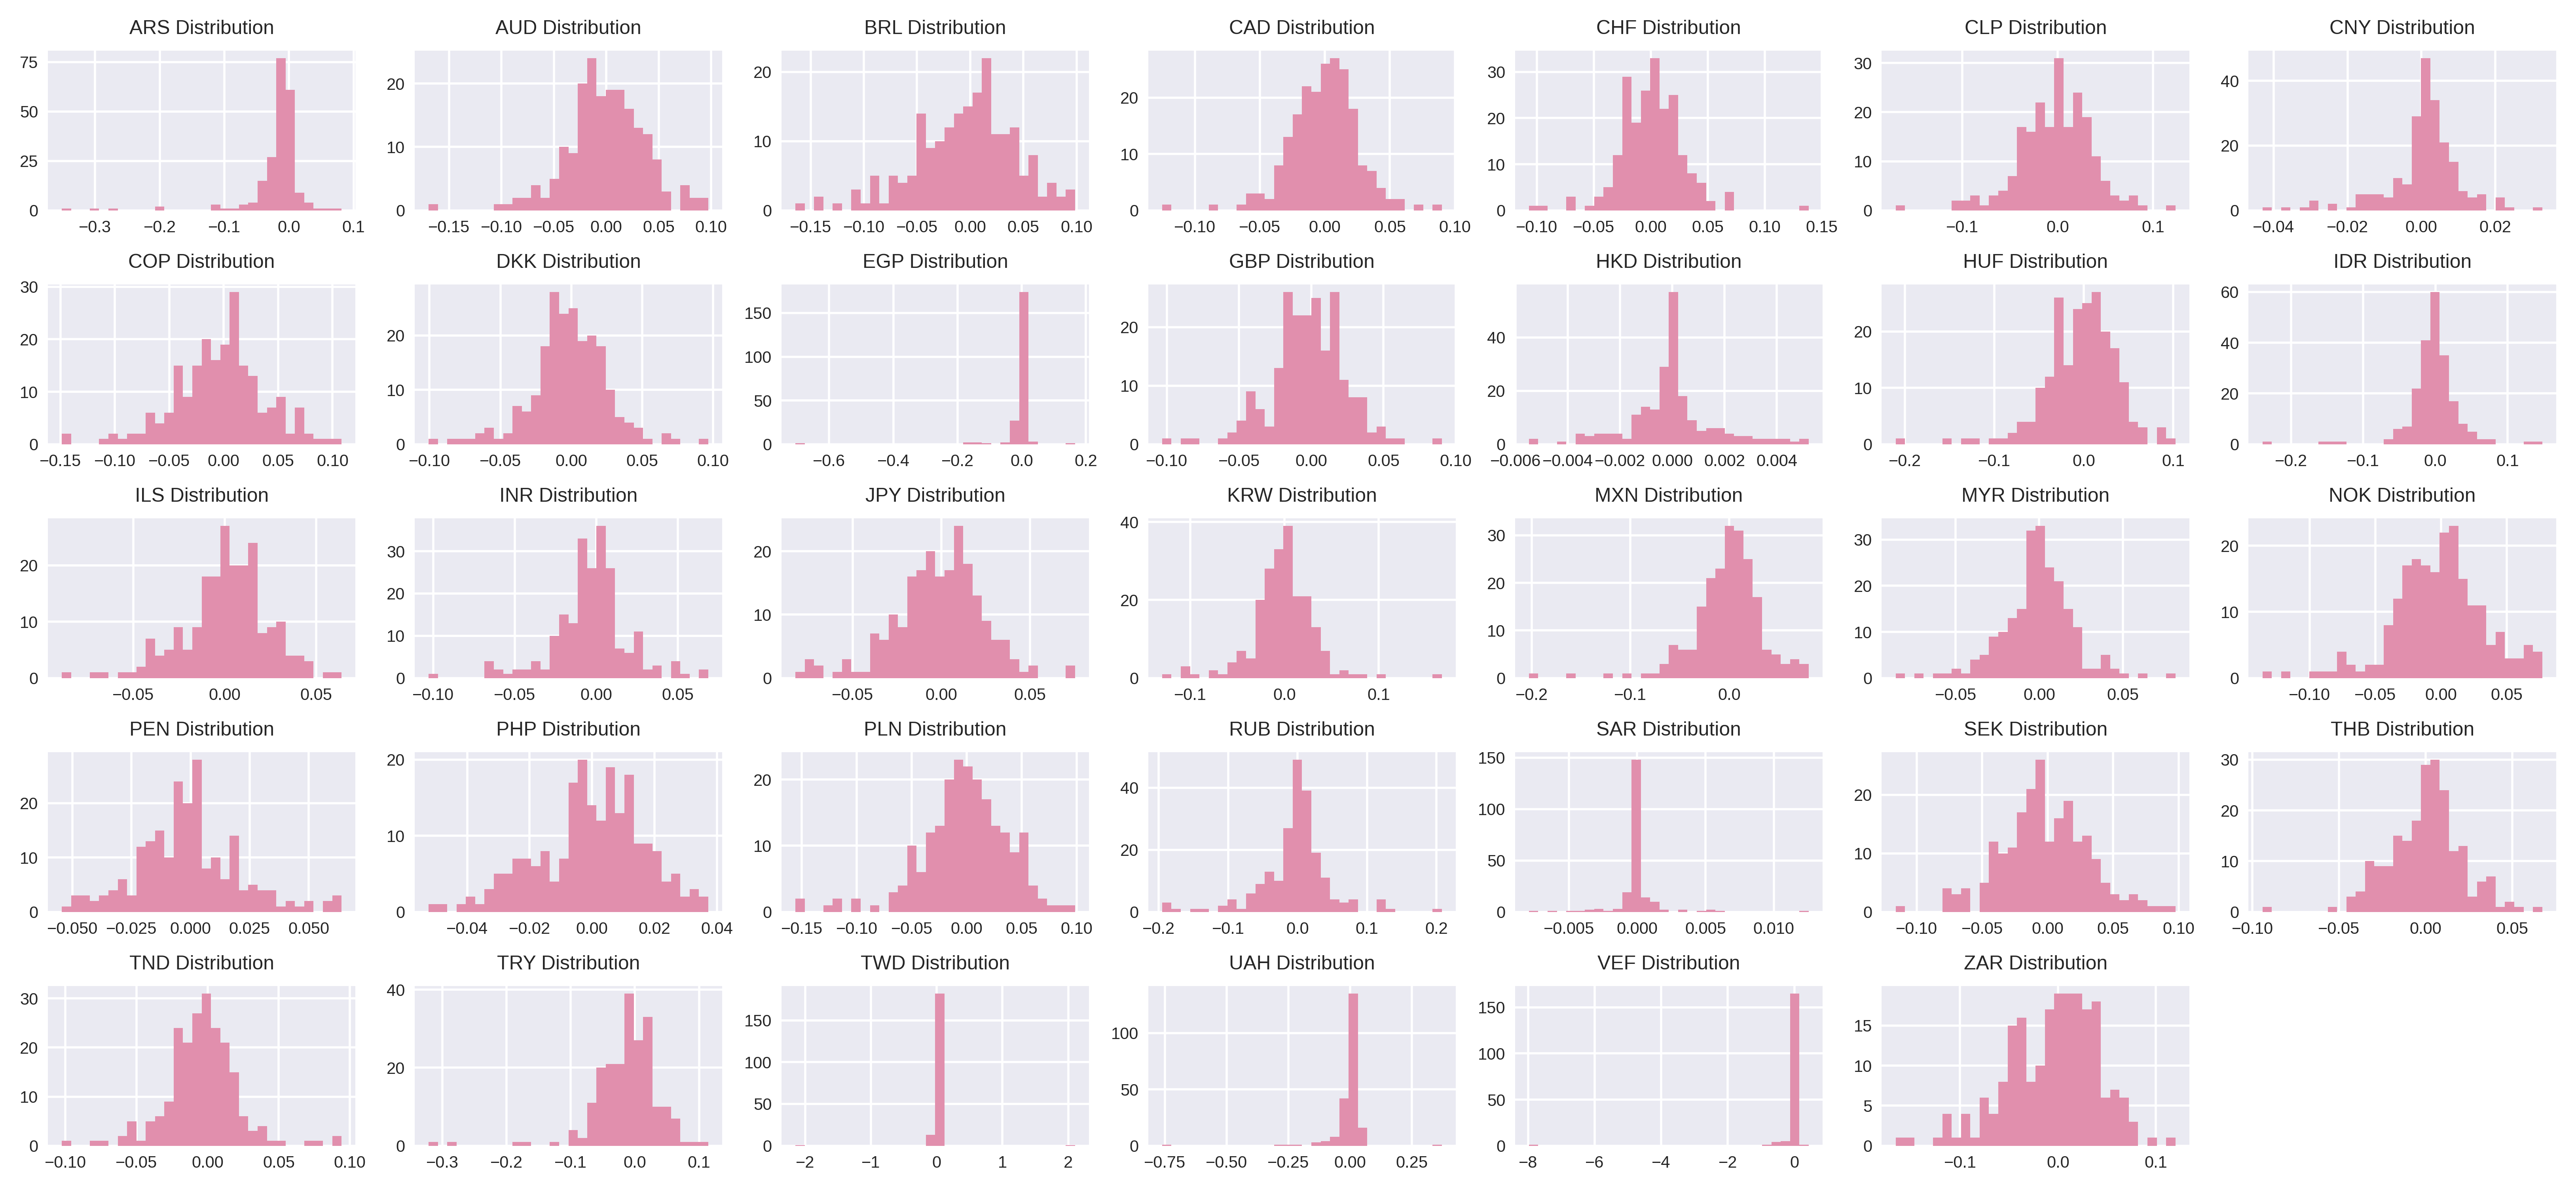

In [ ]:
# Make a function to plot histograms
def draw_histograms(df, variables, n_rows, n_cols):
    """
    Draw histograms for the specified variables in a DataFrame.

    Args:
        df (pandas.DataFrame): The DataFrame containing the data.
        variables (list): A list of variable names to plot.
        n_rows (int): Number of rows in the subplot grid.
        n_cols (int): Number of columns in the subplot grid.

    Returns:
        None
    """
    # Create a figure
    fig = plt.figure(figsize=[13, 6], dpi=500)

    # Add subplots
    for i, var_name in enumerate(variables):
        ax = fig.add_subplot(n_rows, n_cols, i+1)
        # Plot
        df[var_name].hist(bins=30, ax=ax, color='#E18FAD')
        # Set title
        ax.set_title(var_name + " Distribution")

    # Improve appearance a bit
    fig.tight_layout()
    # Display
    plt.show()

    return None

# Display histograms for each exchange rates log returns
draw_histograms(
    monthly_log_returns,
    monthly_log_returns.columns,
    5, 7)

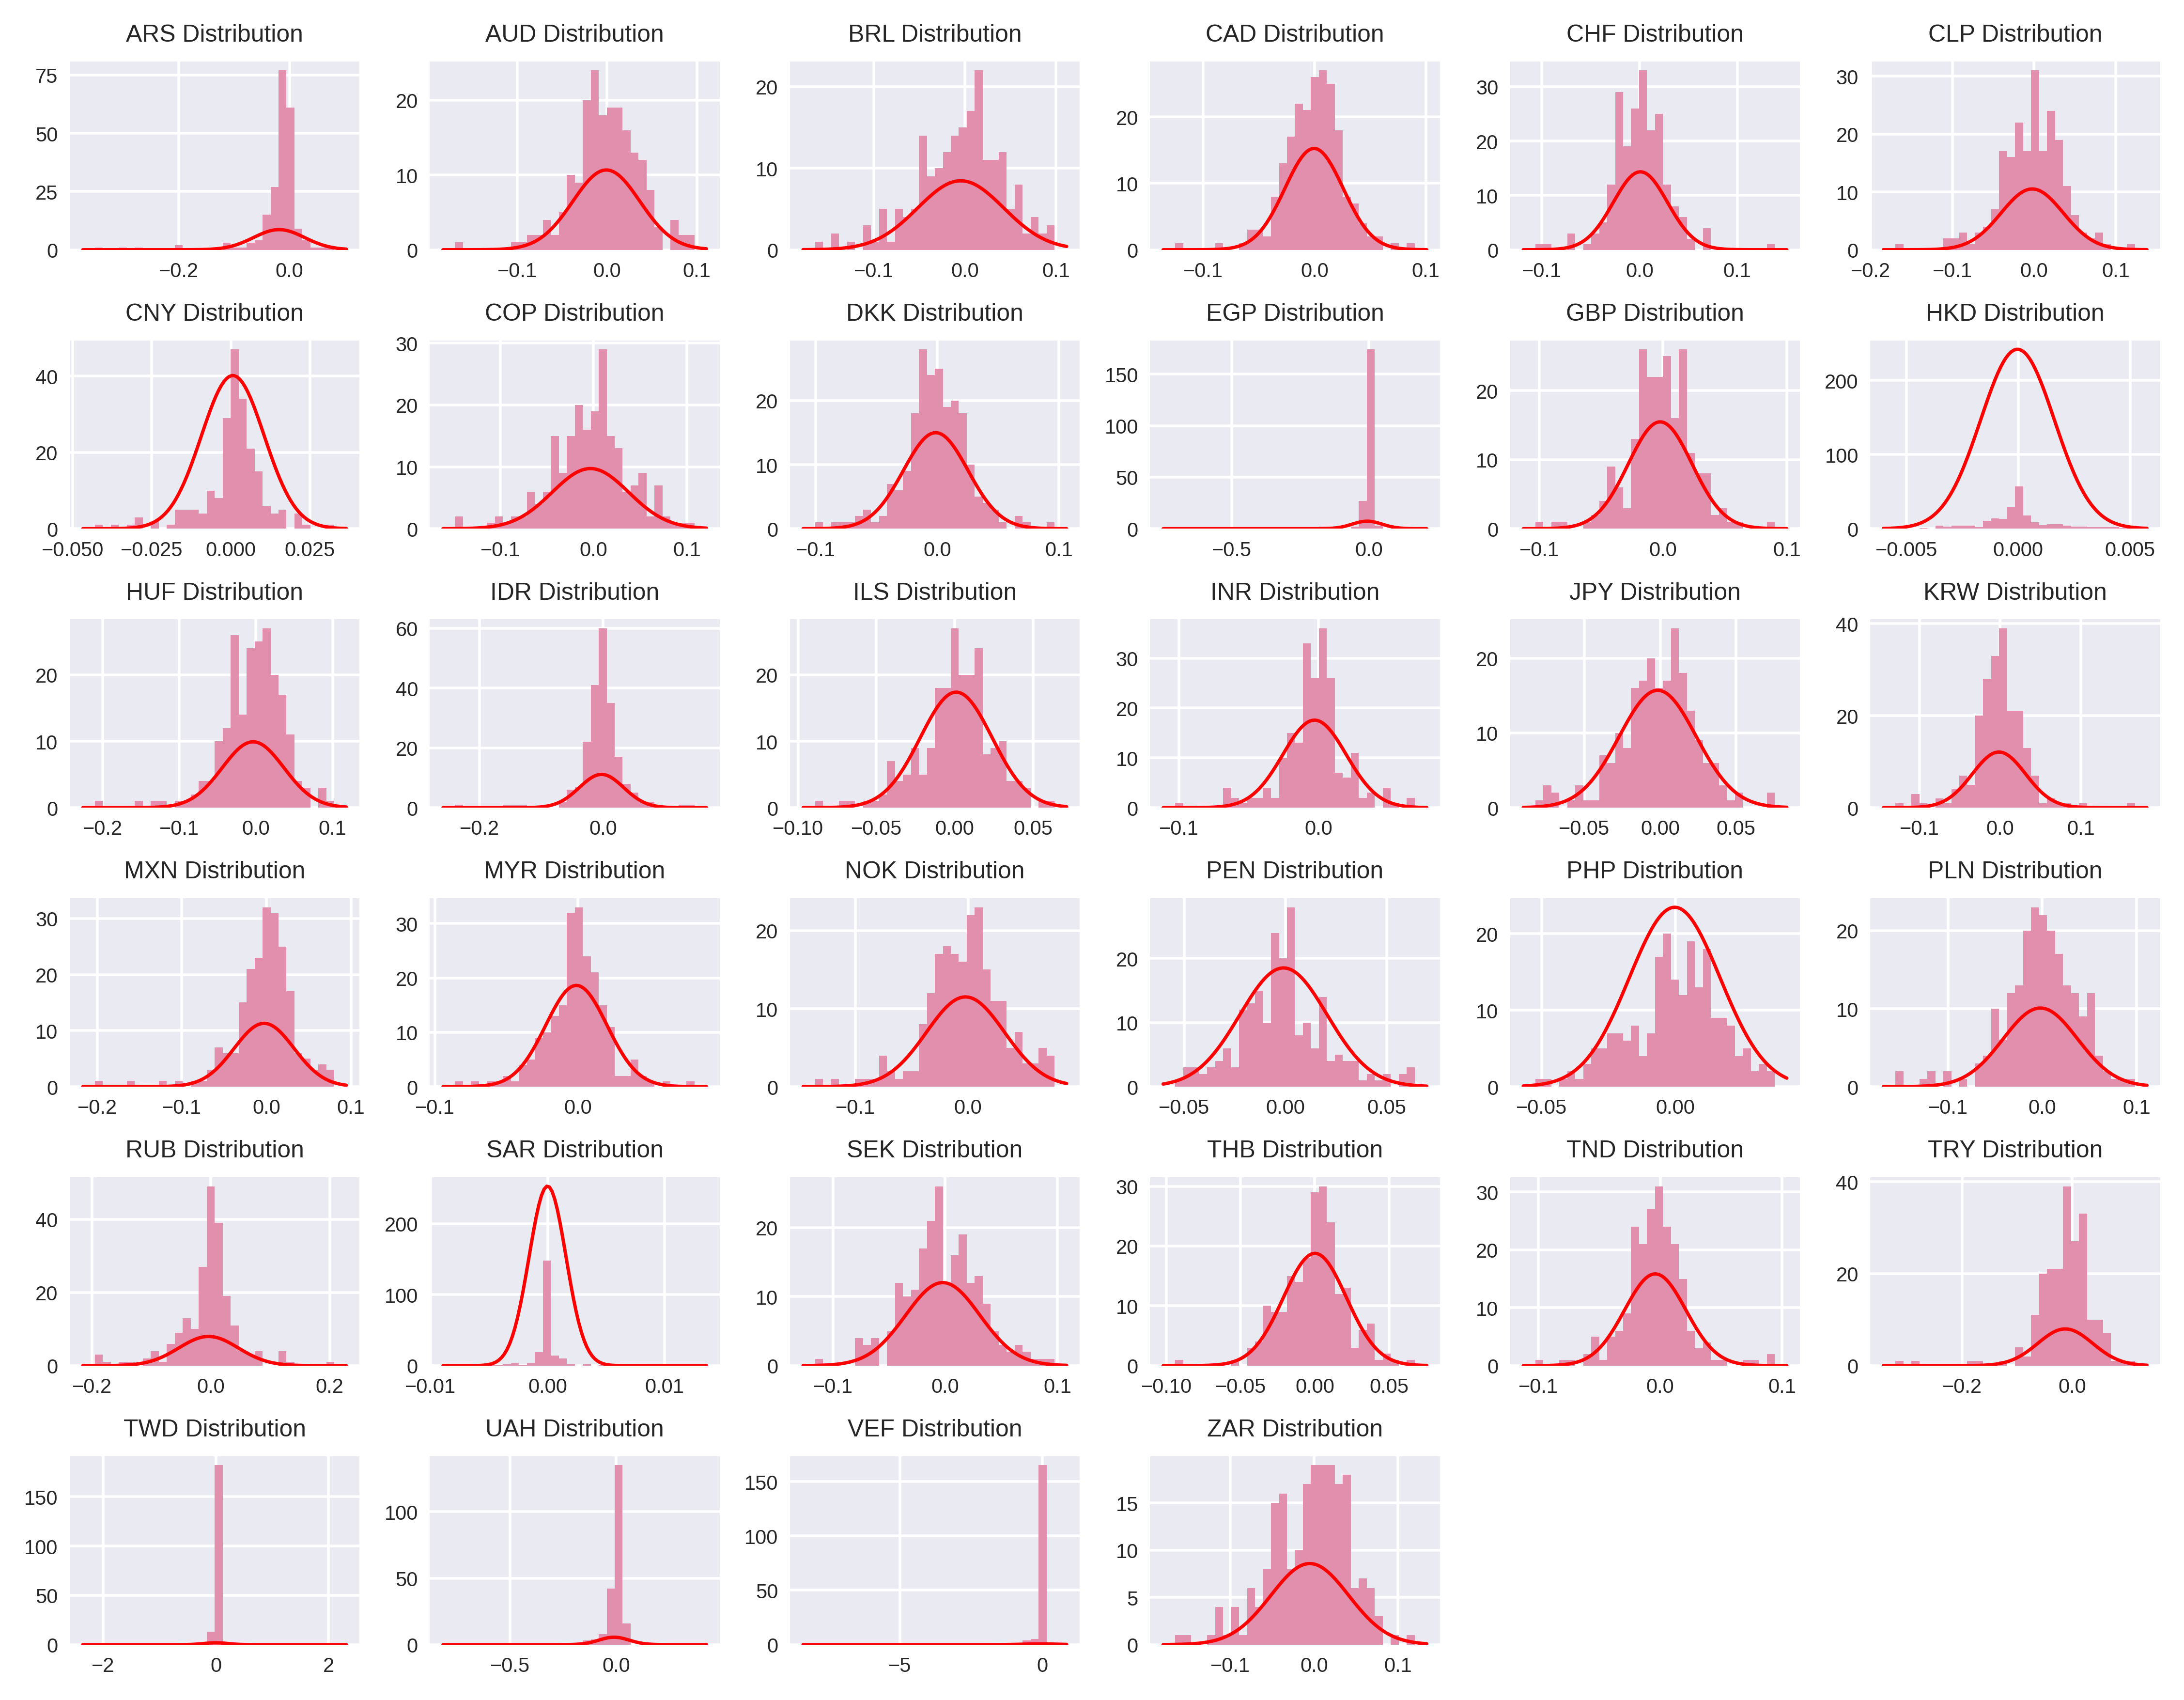

In [ ]:
# Fit normal distributions to data
def draw_histograms_and_pdfs(df, variables, n_rows, n_cols):
    """
    Draw histograms and probability density functions (PDFs)
    for the specified variables in a DataFrame.

    Args:
        df (pandas.DataFrame): The DataFrame containing the data.
        variables (list): A list of variable names to plot.
        n_rows (int): Number of rows in the subplot grid.
        n_cols (int): Number of columns in the subplot grid.

    Returns:
        None
    """
    fig = plt.figure(figsize=[9, 7], dpi=500)

    for i, var_name in enumerate(variables):
        ax = fig.add_subplot(n_rows, n_cols, i+1)
        # Plot
        df[var_name].hist(bins=30, ax=ax, color='#E18FAD')
        # Set title
        ax.set_title(var_name+' Distribution')
        # Plot the PDF
        xmin, xmax = plt.xlim()
        x = np.linspace(xmin, xmax, 100)
        p = norm.pdf(x, norm.fit(df[var_name].dropna())[0],
                    norm.fit(df[var_name].dropna())[1])
        plt.plot(x, p, 'r', linewidth=1)

    # Improve appearance a bit
    fig.tight_layout()

    # Display
    plt.show()
    return None

# Plot the pdf with the histogram
draw_histograms_and_pdfs(monthly_log_returns, monthly_log_returns.columns, 6, 6)
plt.savefig('/content/drive/My Drive/IEOR4150_project/Distribution with normal pdf.png')

# SINGLE EXCHANGE RATE ANALYSIS

In [ ]:
# Make a function to print confidence interval
def interval(df, confidence_level):
    """
    Calculate confidence intervals for the
    mean and variance of columns in a DataFrame.

    Args:
        df (pandas.DataFrame): The DataFrame containing the data.
        confidence_level (float): The desired confidence level
        (between 0 and 1).

    Returns:
        pandas.DataFrame: A DataFrame with confidence intervals
        for the mean and variance of each column.
    """
    alpha = 1 - confidence_level
    t = []
    chisq = []

    # Apply to each columns of dataframe
    for i, var_name in enumerate(df.columns):
        # Calculate sample mean and variance
        mean, std = np.mean(
            df[var_name]),
            np.std(df[var_name], ddof=1)
        # Construct confidence intervals for mean
        t_interval = st.t.interval(
            alpha=alpha,
            df=len(df.columns)-1,
            loc=mean, scale=std)

        # Construct confidence intervals for variance
        var = np.var(df[var_name], ddof=1)

        chisq_left = st.chi2.ppf(1-alpha/2, df=len(df.columns)-1)
        chisq_right = st.chi2.ppf(alpha/2, df=len(df.columns)-1)

        chisq_interval = ((len(df)-1) * var / chisq_left,
                        (len(df)-1) * var / chisq_right)

        # Display the CI(s)
        t.append(t_interval)
        chisq.append(chisq_interval)

    t_results, chisq_results = np.array([t, chisq])

    columns = ['(L(mean),', 'U(mean))', '(L(var),', 'U(var))']
    results = pd.DataFrame(
        np.hstack([t_results, chisq_results]),
        index=df.columns,
        columns=columns).round(6)

    return results

# Find the confidence intervals on data at 0.05 level of significance
interval(monthly_log_returns, 0.95)

,"(L(mean),",U(mean)),"(L(var),",U(var))
ARS,-0.021607,-0.015761,0.008943,0.023818
AUD,-0.003190,0.001545,0.005868,0.015628
BRL,-0.007471,-0.001495,0.009349,0.024898
CAD,-0.002093,0.001221,0.002874,0.007654
CHF,-0.000937,0.002587,0.003249,0.008652
CLP,-0.004670,0.000139,0.006053,0.016119
CNY,-0.000014,0.001245,0.000415,0.001105
COP,-0.005959,-0.000764,0.007065,0.018815
DKK,-0.002959,0.000412,0.002974,0.007920
EGP,-0.009955,-0.003054,0.012462,0.033189


In [ ]:
# Make a function to perform the first-order autoregression
def shift(df):
    """
    Shift the columns of a DataFrame by 1 timestep.

    Args:
        df (pandas.DataFrame): The DataFrame containing the data.

    Returns:
        pandas.DataFrame: The original DataFrame with the first row removed,
        and a new DataFrame with shifted columns.
    """

    # Make a dataframe of shifted data by 1 timestep
    shifted_df = pd.DataFrame()
    for i, var_name in enumerate(df.columns):
        shifted_df[var_name+'_t-1'] = df[var_name].shift(1)

    # Trim data to remove the first rows
    df = df.copy()
    df.drop(index=df.index[0], axis=0, inplace=True)
    shifted_df.drop(
        index=shifted_df.index[0],
        axis=0,
        inplace=True)

    return df, shifted_df


def first_order_autoregression(df):
    """
    Perform first-order autoregression analysis on the columns of a DataFrame.

    Args:
        df (pandas.DataFrame): The DataFrame containing the data.

    Returns:
        list: A list of results including slope, standard error,
        t-test statistics, p-values, intercept,
        R-squared, and scatter plot figures.
    """
    # Make a dataframe of shifted data by 1 timestep
    df, shifted_df = shift(df)

    # Create some lists to display results
    slope = []
    intercept = []
    std_error_beta_1 = []
    t_beta_1 = []
    p_value_beta_1 = []
    std_error_beta_0 = []
    t_beta_0 = []
    p_value_beta_0 = []
    R2 = []

    # Make a fig
    fig = plt.figure(figsize=(39,9), dpi=500)
    predicted_df = pd.DataFrame()

    # Start the loop
    for i, var_name in enumerate(df.columns):

        # Define dependent var (y) and independent var (x)
        x = df[var_name].dropna().shift(1).dropna()
        y = df[var_name].dropna()
        Z = pd.concat([x, y], axis=1).dropna()
        x = Z.iloc[:,0]
        y = Z.iloc[:,1]

        # HERE I WANT TO CODE THE OLS MYSELF, AND COMPARE THE RESULTS
        # WITH THE ONE OBTAINED BY AVAILABLE LIBRARY

        # library model
        model = sm.OLS(
            endog=y.values,
            exog=x.values,
            hasconst=True)

        results = model.fit()
        print('='*97)
        print(' '*30, 'OLS SUMMARY FOR ', var_name)
        print(results.summary())

        # Estimate OLS parameters again by our formula in class
        cov_matrix = np.cov(x, y, ddof=1)

        # Slopes
        beta_1 = cov_matrix[0,1] / cov_matrix[0,0]
        slope.append(beta_1)

        # Intercepts
        beta_0 = np.mean(y) - slope[i]*np.mean(x)
        intercept.append(beta_0)

        # Predicted values
        yhat = intercept[i]*np.ones(len(x)) + slope[i]*x

        # Sum of squared
        SSR = np.sum((y - yhat)**2)
        Sxx = np.sum((x - np.mean(x))**2)
        SST = np.sum((y - np.mean(y))**2)

        # Standard Error of parameters
        std_error_beta_1.append(
            np.sqrt( (1 / (len(x)-2)) * (SSR / Sxx) ))

        std_error_beta_0.append(
            np.sqrt( ((sum(x**2)/len(x)) / (len(x)-2)) * (SSR / Sxx) ))

        # t test statistics and p-values
        t_beta_1.append(
            beta_1 / std_error_beta_1[i])
        p_value_beta_1.append(
            (1 - st.t.cdf(x=abs(t_beta_1[i]), df=len(x)-2))*2)

        t_beta_0.append(
            beta_0 / std_error_beta_1[i])
        p_value_beta_0.append(
            (1 - st.t.cdf(x=abs(t_beta_0[i]), df=len(x)-2))*2)

        # R-squared
        R2.append(1 - SSR/SST)

        # Scatter plots and linear regression lines
        ax = fig.add_subplot(4, 9, i+1)
        ax.tick_params(axis='both', which='major', labelsize=15)
        ax.tick_params(axis='both', which='minor', labelsize=15)
        plt.xlabel(var_name+'(t-1)', size=20, fontweight='bold')
        plt.ylabel(var_name+'(t)', size=20, fontweight='bold')
        ax.set_title(var_name, size='large')
        sns.regplot(x=x.values,y=y.values, color='#E18FAD')

    # Display results in tabular form
    results = [slope, std_error_beta_1,
               t_beta_1, p_value_beta_1,
               intercept, std_error_beta_0,
               t_beta_0, p_value_beta_0, R2]

    print(' '*8, 'FIRST-ORDER REGRESSION ON THE WHOLE DATAFRAME:')

    columns = ['B1', 'SE(B1)', 't(B1)', 'p(B1)', 'B0', 'SE(B0)', 't(B0)', 'p(B0)', 'R2']
    display(pd.DataFrame(
        data=np.array(results).T.round(3),
        index=df.columns,
        columns=columns))

    # Improve appearance a bit
    fig.tight_layout(pad=0.5)

    # Display the figure
    plt.savefig('/content/drive/My Drive/IEOR4150_project/Scatter plots.png')

    fig = plt.figure(figsize=(39,9), dpi=500)

    for i, var_name in enumerate(df.columns):
        # Define dependent var (y) and independent var (x)
        x = shifted_df[var_name+'_t-1']
        y = df[var_name]

        # Scatter plots and linear regression lines
        ax = fig.add_subplot(4, 9, i+1)
        ax.tick_params(axis='both', which='major', labelsize=15)
        ax.tick_params(axis='both', which='minor', labelsize=15)
        plt.xlabel(var_name+'(t-1)', size=20, fontweight='bold')
        plt.ylabel(var_name+'(t)', size=20, fontweight='bold')
        ax.set_title(var_name+' Scatter Plot and Regression Line', size='small')
        sns.residplot(x=x.values, y=y.values, lowess = False, color='#AF4C70')

    fig.tight_layout(pad=0.5)

    plt.savefig('/content/drive/My Drive/IEOR4150_project/Residual plots.png')

    return results

# Perform a regression of the log-return on time
autoregression = first_order_autoregression(monthly_log_returns)

Output hidden; open in https://colab.research.google.com to view.

# TWO EXCHANGE RATE ANALYSIS

In [ ]:
# Test the equality of the two population means
# (use a test for paired data if appropriate)

def paired_test(df):
    """
    Perform paired t-tests between all pairs of columns in a DataFrame.

    Args:
        df (pandas.DataFrame): The DataFrame containing the data.

    Returns:
        pandas.DataFrame, pandas.DataFrame: DataFrames with
        paired test statistics and p-values.
    """
    paired_test_statistics = pd.DataFrame(
        index=df.columns, columns=df.columns)

    paired_test_pvalues = pd.DataFrame(
        index=df.columns, columns=df.columns)

    for i, var_name_row in enumerate(df.columns):
        for j, var_name_col in enumerate(df.columns):
        paired_test_statistics.iloc[i,j] = st.ttest_rel(
            df[var_name_row],
            df[var_name_col],
            nan_policy='omit')[0]

        paired_test_pvalues.iloc[i,j] = st.ttest_rel(
            df[var_name_row],
            df[var_name_col],
            nan_policy='omit')[1]

    return paired_test_statistics, paired_test_pvalues

# Perform the test
paired_test_statistics, paired_test_pvalues = paired_test(monthly_log_returns)

# Display results
print(' '*40,'CORRELATION MATRIX:')
display(monthly_log_returns.corr().round(3))

print('='*130)

print(' '*40, 'PAIRED TEST T STATISTICS:')
display(paired_test_statistics.round(3))

print('='*130)

print(' '*40, 'PAIRED TEST P-VALUES:')
display(paired_test_pvalues.round(3))


                                         CORRELATION MATRIX:


,ARS,AUD,BRL,CAD,CHF,CLP,CNY,COP,DKK,EGP,...,RUB,SAR,SEK,THB,TND,TRY,TWD,UAH,VEF,ZAR
ARS,1.000,0.099,0.293,0.155,-0.034,0.147,0.271,0.170,0.059,0.043,...,0.192,0.021,0.082,0.052,0.028,0.382,0.039,0.059,0.025,0.278
AUD,0.099,1.000,0.606,0.748,0.604,0.597,0.295,0.593,0.727,0.049,...,0.430,0.033,0.786,0.540,0.516,0.475,0.056,0.097,0.074,0.706
BRL,0.293,0.606,1.000,0.530,0.353,0.486,0.220,0.616,0.419,0.062,...,0.355,-0.022,0.514,0.425,0.234,0.471,-0.043,0.168,0.034,0.588
CAD,0.155,0.748,0.530,1.000,0.351,0.482,0.263,0.526,0.532,0.023,...,0.421,-0.009,0.629,0.402,0.289,0.361,0.147,0.072,0.091,0.580
CHF,-0.034,0.604,0.353,0.351,1.000,0.333,0.249,0.343,0.766,0.061,...,0.216,-0.006,0.672,0.420,0.618,0.202,-0.134,0.111,0.021,0.412
CLP,0.147,0.597,0.486,0.482,0.333,1.000,0.243,0.527,0.457,0.026,...,0.235,-0.042,0.482,0.359,0.278,0.310,0.062,0.064,-0.046,0.536
CNY,0.271,0.295,0.220,0.263,0.249,0.243,1.000,0.313,0.300,0.154,...,0.138,-0.023,0.322,0.278,0.232,0.159,0.013,0.097,0.011,0.292
COP,0.170,0.593,0.616,0.526,0.343,0.527,0.313,1.000,0.421,0.063,...,0.454,-0.068,0.513,0.444,0.275,0.422,-0.099,0.180,-0.001,0.548
DKK,0.059,0.727,0.419,0.532,0.766,0.457,0.300,0.421,1.000,0.082,...,0.320,0.019,0.854,0.434,0.711,0.367,0.118,0.093,0.037,0.489
EGP,0.043,0.049,0.062,0.023,0.061,0.026,0.154,0.063,0.082,1.000,...,0.043,-0.038,0.014,0.094,0.086,0.134,0.061,-0.004,-0.004,0.028


PAIRED TEST T STATISTICS:


,ARS,AUD,BRL,CAD,CHF,CLP,CNY,COP,DKK,EGP,...,RUB,SAR,SEK,THB,TND,TRY,TWD,UAH,VEF,ZAR
ARS,NaN,-4.646434,-3.81456,-5.377898,-5.19372,-4.325499,-6.314917,-3.963024,-4.885072,-2.538563,...,-3.570106,-5.89334,-4.418405,-5.487533,-4.105188,-1.717604,-1.277107,-1.658201,0.958925,-3.523656
AUD,4.646434,NaN,1.243824,0.142607,-0.851364,0.928359,-0.521515,1.047325,0.245374,1.323349,...,0.954428,-0.305492,0.773346,-0.379665,1.635399,3.564121,-0.052507,1.667966,1.405514,1.786021
BRL,3.81456,-1.243824,NaN,-1.305286,-1.800905,-0.490617,-1.523119,-0.262361,-1.135803,0.503924,...,-0.114996,-1.333168,-0.938377,-1.517372,-0.016676,2.424128,-0.266215,0.997006,1.306036,0.309468
CAD,5.377898,-0.142607,1.305286,NaN,-0.596499,0.779143,-0.601801,1.210535,0.477541,1.47533,...,1.032355,-0.23818,0.933574,-0.286482,1.713594,3.676245,-0.070009,1.730744,1.409584,1.837577
CHF,5.19372,0.851364,1.800905,0.596499,NaN,1.157205,0.112658,1.489628,1.636422,1.789178,...,1.266194,0.434486,1.705898,0.401571,3.041248,3.693121,0.065478,1.993108,1.453119,2.034839
CLP,4.325499,-0.928359,0.490617,-0.779143,-1.157205,NaN,-1.138648,0.414705,-0.412375,0.940986,...,0.371262,-0.863888,-0.057198,-0.942581,0.65705,2.801272,-0.199834,1.295002,1.346452,1.038611
CNY,6.314917,0.521515,1.523119,0.601801,-0.112658,1.138648,NaN,1.48232,1.07998,1.925094,...,1.257948,0.896437,1.269601,0.374326,2.729742,3.83089,0.033862,2.021955,1.441976,1.903111
COP,3.963024,-1.047325,0.262361,-1.210535,-1.489628,-0.414705,-1.48232,NaN,-0.792886,0.692426,...,0.094268,-1.186894,-0.484611,-1.358736,0.2355,2.650696,-0.221346,1.135937,1.324865,0.643807
DKK,4.885072,-0.245374,1.135803,-0.477541,-1.636422,0.412375,-1.07998,0.792886,NaN,1.299172,...,0.719755,-0.692409,0.713336,-0.76223,2.039399,3.424065,-0.082684,1.575221,1.394726,1.409056
EGP,2.538563,-1.323349,-0.503924,-1.47533,-1.789178,-0.940986,-1.925094,-0.692426,-1.299172,NaN,...,-0.569528,-1.733954,-1.007042,-1.694272,-0.619023,1.241503,-0.452502,0.446612,1.259128,-0.266149


                                         PAIRED TEST P-VALUES:


,ARS,AUD,BRL,CAD,CHF,CLP,CNY,COP,DKK,EGP,...,RUB,SAR,SEK,THB,TND,TRY,TWD,UAH,VEF,ZAR
ARS,NaN,0.000006,0.000182,0.0,0.0,0.000023,0.0,0.000101,0.000002,0.011849,...,0.000441,0.0,0.000016,0.0,0.000058,0.087329,0.203075,0.098756,0.338912,0.000521
AUD,0.000006,--,0.21505,0.886747,0.395606,0.354363,0.602597,0.29624,0.806423,0.187261,...,0.341042,0.760316,0.440249,0.704605,0.10357,0.000459,0.958178,0.096919,0.161631,0.075642
BRL,0.000182,0.21505,--,0.19331,0.07324,0.62424,0.129324,0.793316,0.257412,0.614875,...,0.908565,0.184008,0.349194,0.130768,0.986712,0.016244,0.790354,0.319978,0.193245,0.757291
CAD,0.0,0.886747,0.19331,NaN,0.551478,0.436764,0.54795,0.227422,0.633469,0.141607,...,0.303082,0.811972,0.351586,0.774788,0.088065,0.0003,0.944258,0.084952,0.160427,0.067524
CHF,0.0,0.395606,0.07324,0.551478,NaN,0.248491,0.910408,0.137808,0.103235,0.075014,...,0.206833,0.664377,0.089492,0.688404,0.002653,0.000282,0.94786,0.047532,0.147971,0.043112
CLP,0.000023,0.354363,0.62424,0.436764,0.248491,NaN,0.256135,0.678777,0.680481,0.347783,...,0.710814,0.388626,0.954441,0.346968,0.511861,0.005561,0.841818,0.196728,0.179888,0.300169
CNY,0.0,0.602597,0.129324,0.54795,0.910408,0.256135,NaN,0.13974,0.281378,0.055556,...,0.209794,0.371036,0.205619,0.708536,0.006871,0.000168,0.973022,0.044438,0.151086,0.058381
COP,0.000101,0.29624,0.793316,0.227422,0.137808,0.678777,0.13974,NaN,0.42873,0.489428,...,0.924985,0.236598,0.628453,0.175674,0.814048,0.008639,0.825054,0.257265,0.186934,0.520397
DKK,0.000002,0.806423,0.257412,0.633469,0.103235,0.680481,0.281378,0.42873,NaN,0.195296,...,0.472468,0.489438,0.476422,0.44677,0.042651,0.00074,0.934187,0.116696,0.164856,0.160284
EGP,0.011849,0.187261,0.614875,0.141607,0.075014,0.347783,0.055556,0.489428,0.195296,NaN,...,0.569601,0.08438,0.315063,0.091682,0.536566,0.215792,0.651407,0.655611,0.209651,0.790383


In [ ]:
# Perform a regression of one log-return on the other (all results)
def regression(endog, exog):
    """
    Perform linear regression on the given endogenous and exogenous variables.

    Args:
        endog (array-like): The endogenous variable.
        exog (array-like): The exogenous variable.

    Returns:
        pandas.DataFrame: A DataFrame with regression results
        including coefficients, t-values, p-values, and R-squared.
    """
    exog_const = sm.add_constant(exog)
    model = sm.OLS(endog=endog,exog=exog_const, hasconst=True, missing='drop')
    results = model.fit()

    # Tabular resuls
    table = pd.DataFrame(
        np.hstack(
            [results.params.values.T,
             results.tvalues.values.round(3).T,
             results.pvalues.values.T,
             results.rsquared]
        )[:,np.newaxis].round(4).T)

    table_columns = ['B1', 'B0', 't_1', 't_0', 'p-value_1', 'p-value_0', 'R2']

    table.columns = table_columns

    # THE FOLLOWING GREEN LINES ARE TO SATISFY THE
    # PROJECT REQUIREMENT (R^2 AND PLOTS),
    # BUT THEY ARE SLOW TO RUN SO I DISABLED THEM.

    # Graphical results (enable to see)
    sns.regplot(x=exog,y=endog, color='#E18FAD')
    plt.title('Diagram of data with the least-squared line')
    plt.show()

    sns.residplot(x=exog, y=endog, lowess = False)
    plt.title('Graphical depiction of residuals')
    plt.show()

    return table

# Perform regression of all index on ARS
def regression_all(df):
    """
    Perform linear regression between all pairs of columns in a DataFrame.

    Args:
        df (pandas.DataFrame): The DataFrame containing the data.

    Returns:
        None
    """
    for i, var_name in enumerate(monthly_log_returns.columns):
        regression_all = pd.DataFrame()
        for j, var_name2 in enumerate(monthly_log_returns.columns):
            regression_all = regression_all.append(
                regression(df[var_name], df[var_name2]))
        regression_all.index = df.columns
        print('REGRESSION ON ', var_name)
        display(regression_all)

    return None

regression_all(monthly_log_returns)

# p/s: the graphs take long time to run, so I might disable them

# GEOPOLITICAL RISK AND EXCHANGE RETURN

In [ ]:
# Load data:
gpr_data = pd.read_csv(
    'drive/My Drive/IEOR4150_project/data_gpr_full.csv',
    index_col=0)
gpr_data.index = pd.to_datetime(gpr_data.index)

gpr = gpr_data.loc["01-01-2005":].copy(deep=True).asfreq('M', method='pad')

In [ ]:
# Regression of GPR index on exchange rate return (1 factor)
def regression2(endog, exog):
    """
    Perform linear regression on the given endogenous and exogenous variables.

    Args:
        endog (array-like): The endogenous variable.
        exog (array-like): The exogenous variable.

    Returns:
        pandas.DataFrame: A DataFrame with regression results
        including coefficients, t-values, p-values, and R-squared.
    """

  exog_const = sm.add_constant(exog)
  model = sm.OLS(endog=endog,exog=exog_const, hasconst=True, missing='drop')
  results = model.fit()

  # Tabular resuls
  table = pd.DataFrame(
      np.hstack(
          [results.params.T,
           results.tvalues.round(3).T,
           results.pvalues.T,
           results.rsquared]
      )[:,np.newaxis].round(4).T)

  table_columns = ['B1', 'B0', 't_0', 't_1', 'p-value_0', 'p-value_1', 'R2']

  table.columns = table_columns

  # Graphical results
  sns.regplot(x=exog,y=endog, color='#E18FAD')
  plt.title('Diagram of data with the least-squared line')
  plt.show()

  sns.residplot(x=exog, y=endog, lowess = False)
  plt.title('Graphical depiction of residuals')
  plt.show()

  return table

# Perform OLS on all Exchange rate returns
regression_all2 = pd.DataFrame()

for i, var_name in enumerate(monthly_log_returns.columns):
  y = monthly_log_returns[var_name].values
  x = gpr['GPR_'+var_name].values
  regression_all2 = regression_all2.append(regression2(y, x))

regression_all2.index = monthly_log_returns.columns
regression_all2

# p/s: the graphs take long time to run, so I might disable them

In [ ]:
# Regression of GPR index and Interest rate on exchange rate return (2 factors)
ir_data = pd.read_csv(
    'drive/My Drive/IEOR4150_project/ir_data.csv',
    index_col=0).iloc[:-1,:]

ir_data.index = pd.to_datetime(ir_data.index)

def regression3(endog, exog):
    """
    Perform linear regression on the given endogenous and exogenous variables.

    Args:
        endog (array-like): The endogenous variable.
        exog (array-like): The exogenous variable.

    Returns:
        pandas.DataFrame: A DataFrame with regression results
        including coefficients, t-values, p-values, and R-squared.
    """
    exog_const = sm.add_constant(exog)
    model = sm.OLS(endog=endog,exog=exog_const, hasconst=True, missing='drop')
    results = model.fit()

    # Tabular resuls
    table = pd.DataFrame(
        np.hstack([
            results.params.T,
            results.tvalues.round(3).T,
            results.pvalues.T,
            results.rsquared]
        )[:,np.newaxis].round(4).T)

    table_columns = ['B1', 'B2', 'B0',
                     't_0','t_1', 't_2',
                     'p-value_0','p-value_1', 'p-value_2',
                     'R2']

    table.columns = table_columns
    display(table)

    print(results.summary())
    print(results.params)
    print(results.pvalues.round(4))

    # Graphical results
    sns.regplot(x=exog,y=endog, color='#E18FAD')
    plt.title('Diagram of data with the least-squared line')
    plt.show()

    sns.residplot(x=exog, y=endog, lowess = False)
    plt.title('Graphical depiction of residuals')
    plt.show()

  return table

regression3_all = pd.DataFrame()

for i, var in enumerate(ir_data.columns):
    print(' '*30 ,'REGRESSION ON', var)

    x_1 = pd.DataFrame(gpr['GPR_'+var].copy()).values[1:]
    x_2 = pd.DataFrame(ir_data[var].copy()).shift(1).values[1:]

    y = monthly_log_returns[var][1:].values

    x = np.hstack((x_1, x_2))

    regression3_all = regression3_all.append(regression3(y, x))

regression3_all.index = ir_data.columns
regression3_all

# p/s: the graphs take long time to run, so I might disable them